In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [20]:
# Example file for testing / developing a quick understanding
filename = "../datasets/MBTA-Bus-Arrival-Departure-Times_2024-12.csv"
df = pd.read_csv(filename, low_memory=False)

In [21]:
# Calculate delay for each line
df['time_difference'] = pd.to_datetime(df['actual']) - pd.to_datetime(df['scheduled'])
df['delay_seconds'] = df['time_difference'].dt.total_seconds()
df['delay_headway'] = df['headway'] - df['scheduled_headway']

In [22]:
# Filter outliers that skew averages (delays over 60 minutes)
df = df[(df['delay_seconds'] >= -3600) & (df['delay_seconds'] <= 3600)]

In [23]:
df.dropna(subset=['delay_seconds'], inplace=True)

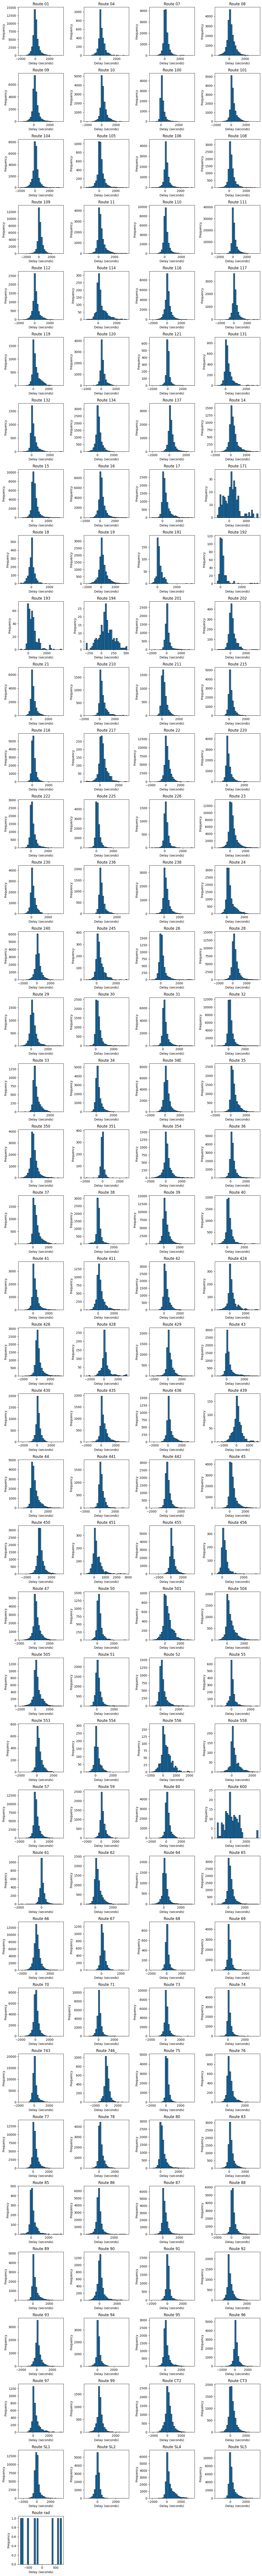

In [24]:
bins      = 30            # histogram granularity
cols      = 4             # plots per row
figscale  = 3             # size multiplier (3 → ~3″×3″ per subplot)
# --------------------------------------

routes = sorted(df['route_id'].unique())
n      = len(routes)
rows   = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * figscale, rows * figscale), squeeze=False)

for i, route in enumerate(routes):
    r, c = divmod(i, cols)
    ax   = axes[r][c]

    # plot histogram for this route
    ax.hist(df.loc[df['route_id'] == route, 'delay_seconds'],
            bins=bins, edgecolor='black')
    ax.set_title(f'Route {route}')
    ax.set_xlabel('Delay (seconds)')
    ax.set_ylabel('Frequency')

# turn off any empty subplot frames (when routes % cols ≠ 0)
for j in range(i + 1, rows * cols):
    r, c = divmod(j, cols)
    axes[r][c].set_visible(False)

plt.tight_layout()
plt.show()
